# Selecting model

## Homebrew Convolutional Neural Network

In [1]:
from hyper_tuning_helper_functions import model_cnn_2_classes, show_classification_evaluation_metrics
from load_datasets import create_generators, extract_feature_maps

In [10]:
train_generator_64x64, X_test_64x64, y_test_64x64 = create_generators(
    (64, 64), just_train_generator=True
)


cat_dog_32x32_image_model = model_cnn_2_classes(
    [32, 64, 128, 128], [(512, 0)], name="model_1", input_shape=(64, 64, 3)
)


cat_dog_32x32_image_model.fit(
    train_generator_64x64,
    steps_per_epoch=50,
    epochs=137,
    verbose=0,
)

2022-05-12 15:43:00.629394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2022-05-12 15:44:39.318403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.64      0.73      0.68       433
           1       0.77      0.68      0.72       567

    accuracy                           0.70      1000
   macro avg       0.70      0.71      0.70      1000
weighted avg       0.71      0.70      0.70      1000



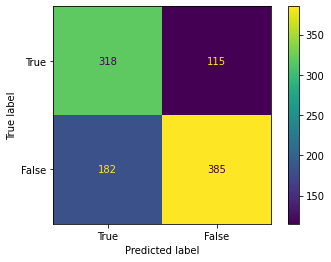

In [11]:
y_pred_64x64 = cat_dog_32x32_image_model.predict(X_test_64x64)
y_pred_64x64 = (y_pred_64x64 > .5) * 1

show_classification_evaluation_metrics(y_test_64x64, y_pred_64x64)

## Xception with Random Forest Classifier

### Feature Extraction

In [3]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.ensemble import RandomForestClassifier

image_size = 299

cat_dog_299x299_feature_extractor = Sequential(
    [
        Xception(
            weights="imagenet",
            include_top=False,
            input_shape=(image_size, image_size, 3),
        ),
        GlobalAveragePooling2D(),
    ]
)

train_generator_299x299, X_test_299x299, y_test_299x299 = create_generators(
    (image_size, image_size), just_train_generator=True
)

X_train_299x299, y_train_299x299 = extract_feature_maps(
    cat_dog_299x299_feature_extractor, train_generator_299x299
)

2022-05-12 16:07:48.388703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

### Prediction

In [ ]:
cat_dog_299x299_image_model = RandomForestClassifier()
cat_dog_299x299_image_model.fit(X_train_299x299, y_train_299x299)

In [ ]:
y_pred_299x299 = cat_dog_299x299_image_model.predict(X_test_299x299)

show_classification_evaluation_metrics(y_test_299x299, y_pred_299x299)